### Creació base de dades a partir de les taules de MIMIC-III

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 

#### Carreguem les taules

In [2]:
patients = pd.read_csv("PATIENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")
icustays = pd.read_csv("ICUSTAYS.csv")
callout = pd.read_csv("CALLOUT.csv")
transfers = pd.read_csv("TRANSFERS.csv")

In [3]:
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


#### Descartem aquells pacients que van ser recollits amb el sistema informàtic CareVue, ens quedem només amb els pacients de Metavision. 

In [5]:
icustays8_12 = icustays[icustays["DBSOURCE"] == "metavision"]

In [6]:
icustays_unique = icustays8_12.drop_duplicates(subset="SUBJECT_ID")

In [7]:
#número de pacients enregistrat en el sistema Metavision (pacients entre 2008-2012)
num_pacients = icustays_unique["SUBJECT_ID"].shape
print(f"Tenim {num_pacients[0]} pacients enregistrat en el sistema metavision")

Tenim 17710 pacients enregistrat en el sistema metavision


#### De les taules Admissions i Patients agafem els pacients entre 2008-2012 

In [8]:
admissions_icu = admissions.loc[admissions["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
admissions_icu

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
12,33,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1
13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
15,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [9]:
patients_icu = patients.loc[patients["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
patients_icu

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
15,249,266,F,2090-12-17 00:00:00,NaN,NaN,NaN,0
22,628,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,NaN,1
28,634,671,M,2148-03-27 00:00:00,NaN,NaN,NaN,0
44,650,689,F,2128-12-27 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


#### Transformacions de la taula PATIENTS

Aquesta taula indica els pacients que estan associats com a mínim amb una admissió a la UCI. Aquesta està relacionada amb les taules **Admissions** i **Icustays** a través del *Subject_id*.

##### Consideracions importants
 - **DOB** han sigut desplaçades per pacients d'edat > 89 anys. La mediana d'edat per pacients dels quals l'edat ha sigut desplaçada és 91.4.

 - Subject_id és la *clau candidata*, és a dir, que si s'elimina aquesta columna podria haver files amb valors duplicats.
 
 
Ens quedem amb les variables d'interés, en aquest cas:
 - Subject_id: Identificador únic per cada pacient.
 - Gender
 - Expire_flag (0 si el pacient viu, 1 si mort)
 - DOB (Date Of Birth)

In [10]:
patients_df = pd.DataFrame()
patients_df["subject_id"] = patients_icu["SUBJECT_ID"]

In [11]:
patients_df["gender"] = patients_icu["GENDER"]

In [12]:
patients_df["is_dead"] = patients_icu["EXPIRE_FLAG"]

In [13]:
patients_df["DOB"] = patients_icu["DOB"]

In [14]:
patients_df

,subject_id,gender,is_dead,DOB
0,249,F,0,2075-03-13 00:00:00
15,266,F,0,2090-12-17 00:00:00
22,665,M,1,2052-05-20 00:00:00
28,671,M,0,2148-03-27 00:00:00
44,689,F,0,2128-12-27 00:00:00
...,...,...,...,...
46515,44089,M,0,2026-05-25 00:00:00
46516,44115,F,0,2124-07-27 00:00:00
46517,44123,F,1,2049-11-26 00:00:00
46518,44126,F,0,2076-07-25 00:00:00


#### Transformacions necessàries per la taula ADMISSIONS

Aquesta taula conté informació sobre les admissions dels pacients a l'hospital. Cada pacient és assignat un *hadm_id* per cada estada al hospital. Està relacionada amb la taula **Patients** a través del *subject_id*.

##### Consideracions importants

 - Les dades de la taula han sigut recollides de les bases de dades d'admissions, discharge i transfers del hospital. Normalment, es fa referència a aquest tipus de dades com dades 'ADT'.

 - Es contempla informació de donants d'organs que han mort durant l'estada al hospital. Solen ser admissions al hospital molt curtes, on la Length Of Stay pot tenir valors negatius. A més a més, el temps de la mort concorda amb el temps de la mort de l'última admissió del pacient.

 - La **clau primaria** d'aquesta taula és la columna *hadm_id*.
 
 - La **clau forànea**, és a dir, els valors d'aquesta taula utilitzats per relacionar-la amb altres taules és la columna *subject_id*.

Ens quedem amb les següents variables: 

 - Subject_ID
 - ADMITTIME: Data i temps en el que el pacient va ser admès al hospital.
 - ADMISSION_TYPE: Tipus d'admissió, pot ser:
    - Urgent
    - Elective
    - Newborn 
    - Emergency.
    
 - DISCHARGE_LOCATION: 
    - Home
    - Home Health Care
    - Dead/Expired
    - SNF(Skilled Nursing Facility).
    
 - ADMIT_LOCATION:
    - Phys referal/normal deli: El pacient és derivat a un altre tipus de metge però sense ser una urgència.
    - Emergency room admit.
    - Clinic referral/premature: El pacient és transferit a un altre centre de manera urgent per canvis en l'estat d'aquest.
    - Transfer from other hosp: El pacient ha sigut transferit des d'un altre centre mèdic.
    - TRSF within this facility

In [15]:
admissions_df = pd.DataFrame()

In [16]:
admissions_df["subject_id"] = admissions_icu["SUBJECT_ID"]

In [17]:
admissions_df["hadm_id"] = admissions_icu["HADM_ID"]

In [18]:
admissions_df["admit_datetime"] = admissions_icu["ADMITTIME"]

Codificació del tipus d'admissió al hospital: 
- 1 si és una intervenció mèdica o quirúrgica planificada no d'urgències.
- 2 si urgències o emergència.

In [52]:
#adm_type_arr = np.array(admissions_icu["ADMISSION_TYPE"])
#adm_type_arr[adm_type_arr == "ELECTIVE"] = 1
#adm_type_arr[adm_type_arr != 1] = 2

In [19]:
admissions_df["admission_type"] = admissions_icu["ADMISSION_TYPE"]

Codificació del lloc d'admissió al hospital
- 1 si PHYS REFERRAL/NORMAL DELI, és a dir, si el pacient és derivat a un altre tipus de metge però sense ser una urgència.
- 2 si TRANSFER FROM HOSP/EXTRAM o TRANSFER FROM OTHER HEALT, és a dir, el pacient ha sigut transferit des d'un altre centre mèdic.
- 3 si CLINIC REFERRAL/PREMATURE, és a dir, si el pacient és transferit a un altre centre de manera urgent per canvis en l'estat d'aquest.
- 4 si EMERGENCY ROOM ADMIT
- 5 si TRANSFER FROM SKILLED NUR, és a dir, el pacient és transferit des d'una altre unitat de cuidats especialitzats (normalment, per pacients en rehabilitació o amb malalties de llarga durada)
- 6 si TRSF WITHIN THIS FACILITY

In [70]:
"""
admloc_type = np.array(admissions_icu["ADMISSION_LOCATION"])

for tp in range(len(admit_location_types)):
    if admit_location_types[tp] == "TRANSFER FROM OTHER HEALT":
        admloc_type[admloc_type == admit_location_types[tp]] = 2
    if tp == 6:
        admloc_type[admloc_type == admit_location_types[tp]] = tp
    else:
        admloc_type[admloc_type == admit_location_types[tp]] = tp+1
"""

In [20]:
# Com que l'etiqueta "Transfer from hosp/extram" té el mateix significat que "Transfer from other health",
# la canviem a "Transfer from other hosp" per tots els pacients que tinguin el valor d'alguna de les dues anteriors.

admloc_type = np.array(admissions_icu["ADMISSION_LOCATION"])
admloc_type[admloc_type == "TRANSFER FROM HOSP/EXTRAM"] = "TRANSFER FROM OTHER HOSP"
admloc_type[admloc_type == "TRANSFER FROM OTHER HEALT"] = "TRANSFER FROM OTHER HOSP"
admissions_df["admit_location"] = admloc_type

In [21]:
admissions_df["discharge_location"] = admissions_icu["DISCHARGE_LOCATION"]

In [22]:
admissions_df

,subject_id,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
1,23,152223,2153-09-03 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
2,23,124321,2157-10-18 19:34:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE
12,34,115799,2186-07-18 16:46:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME
13,34,144319,2191-02-23 05:23:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
15,36,182104,2131-04-30 07:15:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
...,...,...,...,...,...,...
58971,98800,191113,2131-03-30 21:13:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME
58972,98802,101071,2151-03-05 20:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED
58973,98805,122631,2200-09-12 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
58974,98813,170407,2128-11-11 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF


In [90]:
p249 = admissions_df[admissions_df["subject_id"] == 249]
p249

,subject_id,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
540,249,116935,2149-12-17 20:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF
541,249,149546,2155-02-03 20:16:00,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP
542,249,158975,2156-04-27 15:33:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF


Unim la taula PATIENTS i ADMISSIONS

In [23]:
admis_with_patients_df = patients_df.merge(admissions_df, on="subject_id", how="right")
admis_with_patients_df

,subject_id,gender,is_dead,DOB,hadm_id,admit_datetime,admission_type,admit_location,discharge_location
0,23,M,0,2082-07-17 00:00:00,152223,2153-09-03 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
1,23,M,0,2082-07-17 00:00:00,124321,2157-10-18 19:34:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE
2,34,M,1,1886-07-18 00:00:00,115799,2186-07-18 16:46:00,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME
3,34,M,1,1886-07-18 00:00:00,144319,2191-02-23 05:23:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
4,36,M,0,2061-08-17 00:00:00,182104,2131-04-30 07:15:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE
...,...,...,...,...,...,...,...,...,...
25150,98800,F,0,2111-11-05 00:00:00,191113,2131-03-30 21:13:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME
25151,98802,F,1,2067-09-21 00:00:00,101071,2151-03-05 20:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED
25152,98805,M,0,2158-03-02 00:00:00,122631,2200-09-12 07:15:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE
25153,98813,F,0,2068-02-04 00:00:00,170407,2128-11-11 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF


Fem el càlcul de l'edat dels pacients en cada estada amb l'admit_datetime i la DOB i esborrem aquestes dues columnes

In [24]:
# Canviem el datetime object de "admit_datetime" i "DOB" per poder calcular la diferència.
admis_with_patients_df["age"] = admis_with_patients_df.apply(lambda x: (datetime.strptime(x["admit_datetime"], "%Y-%m-%d %H:%M:%S") - datetime.strptime(x["DOB"], "%Y-%m-%d %H:%M:%S")).days//365, axis=1)

In [25]:
# Els pacients que tenen edats => a 300 anys els hi restem 210 anys per trobar l'edat correcta dels pacients amb edats >= 90
admis_with_patients_df["age"] = admis_with_patients_df["age"].apply(lambda x: x-210 if x>=300 else x)

In [26]:
# Eliminem les columnes de "DOB" i admit_datetime perquè ja no les necessitem
admis_with_patients_df.drop(["DOB", "admit_datetime"], axis=1, inplace=True)

In [27]:
admis_with_patients_df

,subject_id,gender,is_dead,hadm_id,admission_type,admit_location,discharge_location,age
0,23,M,0,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,71
1,23,M,0,124321,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME HEALTH CARE,75
2,34,M,1,115799,EMERGENCY,TRANSFER FROM OTHER HOSP,HOME,90
3,34,M,1,144319,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,94
4,36,M,0,182104,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,69
...,...,...,...,...,...,...,...,...
25150,98800,F,0,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,19
25151,98802,F,1,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,83
25152,98805,M,0,122631,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,42
25153,98813,F,0,170407,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,60


In [28]:
# Agafem els pacients de la taula callout que han sigut enregistrats entre 2008-2012 (sistema Metavision)
callout_icu = callout.loc[callout["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
callout_icu[callout_icu["SUBJECT_ID"] == 249]

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
67,131,249,149546,50.0,NaN,45.0,MICU,1,MED,1,...,Inactive,Discharged,45.0,Acknowledged,2155-02-05 11:35:45,2155-02-05 11:35:45,2155-02-05 11:52:43,2155-02-05 18:55:23,2155-02-05 15:10:27,NaN
68,132,249,149546,14.0,NaN,31.0,TSICU,31,NMED,1,...,Inactive,Discharged,31.0,Acknowledged,2155-02-09 08:51:08,2155-02-11 10:28:46,2155-02-11 10:42:41,2155-02-11 16:25:30,2155-02-11 12:10:47,NaN
69,133,249,158975,52.0,MICU,52.0,MICU,28,MED,1,...,Inactive,Cancelled,NaN,Acknowledged,2156-05-03 11:28:28,2156-05-03 12:16:22,2156-05-03 12:09:32,2156-05-03 12:16:22,NaN,NaN
70,134,249,158975,52.0,NaN,28.0,MICU,28,CCU,1,...,Inactive,Discharged,28.0,Acknowledged,2156-05-03 16:17:43,2156-05-03 16:17:43,2156-05-03 16:20:34,2156-05-03 18:56:13,2156-05-03 16:42:11,NaN
71,135,249,158975,52.0,NaN,28.0,MICU,28,SURG,0,...,Inactive,Discharged,28.0,Acknowledged,2156-05-11 13:37:49,2156-05-11 13:37:49,2156-05-11 13:40:57,2156-05-11 19:43:38,2156-05-11 17:58:14,NaN


#### Transformacions necessàries per la taula CALLOUT

Aquesta taula conté informació sobre els pacients que estaven preparats per ser donats d'alta a la UCI, i si realment és van donar d'alta. Quan a un pacient li arriba la hora d'abandonar la UCI, se sol dir que el pacient és "called out". Aquest process contempla les següents passes: 

   1. Registrar que el pacient està preparat per deixar la UCI i les precaucions especials que cal prendre si es requereixen. <br>
   2. L'aprovació d'un superior demanant un llit fora de la UCI.<br>
   3. Un periode de temps considerat per fer la transferència del pacient fora de la UCI.<br>
   4. La resolució: Si finalment el pacient abandona la UCI o no.

La taula **Callout** està relacionada amb la taula **Patients** a través del *subject_id* i la taula **Admissions** a través del *hadm_id*.

##### Consideracions importants

 - No hi ha dades en aquesta taula per tots els pacients adults.

 - La informació d'aquesta taula mai es troba per nounats.

 - La **clau primària** és *row_id*.

 - Les **claus foràneas** són: *subject_id* i *hadm_id*.<br>

<br>Ens quedem amb les següents variables: 

 - HADM_ID: Identificador de l'admissió al hospital del pacient.
 - CURR_CAREUNIT: Tipus de UCI actual del pacient.
 
     - CCU: Coronary care unit
     - CSRU: Cardiac surgery recovery unit
     - MICU: Medical intensive care unit
     - NICU: Neonatal intensive care unit
     - NWARD: Neonatal ward
     - SICU: Surgical intensive care unit
     - TSICU: Trauma/surgical intensive care unit

 - CALLOUT_SERVICE: Servei mèdic al que el pacient és donat d'alta.
 
      - CCU: Coronary Care Unit
      - CMED: Cardiac Medical
      - CSURG: Cardiac Surgery
      - ENT: Department that looks after patiens who have diseases or symptoms affecting Ear, Nose, and Throat.
      - GU: Genitourinary
      - GYN: Gynecology
      - MED: Medical
      - NB: Newborn
      - NBB: Newborn Nursery
      - NMED: Neonatal Medical
      - NSURG: Neonatal Surgical
      - OBS: Obstetrics
      - OMED: Obstetric Medical
      - ORTHO: Orthopedic
      - PSURG: Plastic Surgery
      - PSYCH: Psychiatry
      - SURG: Surgical
      - TRAUM: Trauma
      - TSURG: Trauma Surgery
      - VSURG: Vascular Surgery

 - CALLOUT_OUTCOME: 
    - Cancelled: Si el procés ha sigut cancel·lat, el pacient roman a la UCI.
    - Discharged: El pacient ha sigut donat d'alta de la UCI

 - OUTCOMETIME: Temps i data en les que es va realitzar el callout.

In [29]:
callout_df = pd.DataFrame()

In [30]:
callout_df["subject_id"] = callout_icu["SUBJECT_ID"]

In [31]:
callout_df["hadm_id"] = callout_icu["HADM_ID"]

In [32]:
callout_df["current_careunit"] = callout_icu["CURR_CAREUNIT"]

In [33]:
callout_df["discharge_careunit"] = callout_icu["CALLOUT_SERVICE"]

In [34]:
callout_df["is_discharged"] = callout_icu.loc[:, "CALLOUT_OUTCOME"].apply(lambda x: 0 if x.lower()=="cancelled" else 1)

In [35]:
callout_df["icu_out_time"] = callout_icu["OUTCOMETIME"]

In [36]:
num_discharged = np.array(callout_df["is_discharged"])
print(f"Número de pacients on la variable is_discharge = 1: {np.sum(num_discharged)}")
print(f"Número de pacients totals de la taula callout: {callout_df.shape[0]}")

Número de pacients on la variable is_discharge = 1: 20559
Número de pacients totals de la taula callout: 23779


In [37]:
# Eliminem aquelles files on el pacient no ha sigut transferit, és a dir is_discharged = 0
callout_df = callout_df[callout_df["is_discharged"] == 1]

In [38]:
# Esborrem la columna is_discharged perquè no proporciona informació rellevant, ja que l'estat de is_discharged de tots els pacients és el mateix.
callout_df = callout_df.drop(columns=["is_discharged"])

In [39]:
callout_df

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time
0,854,175684,MICU,MED,2146-10-05 18:55:22
27,357,174486,MICU,MED,2197-12-26 15:40:05
28,357,145674,MICU,NMED,2198-08-04 02:10:04
29,357,101651,CCU,CCU,2199-10-21 10:40:05
32,357,117876,SICU,NMED,2200-01-07 21:40:04
...,...,...,...,...,...
34493,94046,115445,SICU,SURG,2112-08-25 00:43:14
34494,94046,199742,MICU,MED,2112-11-01 19:42:07
34495,94049,135809,MICU,MED,2112-10-09 17:40:05
34496,94050,173013,MICU,MED,2165-10-07 19:10:11


In [40]:
# Ordena per files segons els valors de les columnes de "hadm_id" i "icu_out_time" de manera ascendent.
callout_df = callout_df.sort_values(["hadm_id", "icu_out_time"], axis=0)

In [41]:
# Comptem quants cops apareix el mateix "hadm_id" per saber quants cops ha sigut ingressat a la UCI un pacient a la mateixa estada al hospital
callout_df["callout_id"] = callout_df.groupby(["hadm_id"]).cumcount()+1

In [42]:
# Calculem un id únic per estades a la UCI
callout_df["callout_id"] = callout_df.apply(lambda x: str(x["hadm_id"])+"_"+str(x["callout_id"]), axis=1)

In [43]:
callout_df

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
24784,58526,100001,MICU,MED,2117-09-15 18:14:40,100001_1
19431,54610,100003,MICU,MED,2150-04-19 14:25:08,100003_1
22156,55853,100010,SICU,GU,2109-12-12 12:28:10,100010_1
31925,87977,100011,TSICU,TRAUM,2177-09-09 17:11:45,100011_1
24997,60039,100012,CSRU,CSURG,2177-03-18 00:57:27,100012_1
...,...,...,...,...,...,...
16880,42131,199967,SICU,NMED,2184-08-02 16:59:05,199967_1
32526,81561,199972,CSRU,CSURG,2186-09-06 13:25:03,199972_1
15197,41115,199979,CSRU,CSURG,2182-02-07 18:40:24,199979_1
21524,55617,199984,CCU,CCU,2191-06-10 18:40:24,199984_1


In [44]:
paciente_249 = callout_df[callout_df["subject_id"] == 249]
paciente_249

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
67,249,149546,MICU,MED,2155-02-05 18:55:23,149546_1
68,249,149546,TSICU,NMED,2155-02-11 16:25:30,149546_2
70,249,158975,MICU,CCU,2156-05-03 18:56:13,158975_1
71,249,158975,MICU,SURG,2156-05-11 19:43:38,158975_2


Fem la unió de la taula _callout\_df_ amb la taula _admis\_with\_patients\_df_

In [63]:
#admis_patient_callout_df = admis_with_patients_df.merge(callout_df, on="hadm_id", how="left")
#admis_patient_callout_df

#### Transformacions necessàries per la taula ICUSTAYS

Aquesta taula defineix una fila per cada estada a la UCI de cada pacient, on les estades són identificades de manera única pel *icustay_id*.

Aquesta taula està relacionada amb **Patients** amb *subject_id* i amb **Admissions** amb *hadm_id*.

##### Consideracions importants

- L'*icustay_id* no ha sigut generat a partir de cap identificador de les dades crues. Ja que a la base de dades de l'hospital i de la UCI la informació no està intrínsicament vinculada, i per tant, no existeix un identificador únic per estada a la UCI.
    
- La taula **Icustays** deriva de la taula **Transfers**. En particular, agrupa la informació de la taula **Transfers** en base a l'identificador *icustays_id*, i exclou aquelles files on no existeix un *icustay_id*.

- La **clau primària** és l'identificador *icustays_id*.
- Les **claus foràneas** són: *subject_id* i *hadm_id*.

<br>Ens quedem amb les següents variables: 

 - HADM_ID: ID de l'admissió al hospital.
 - INTIME: Temps i data de l'admissió a la ICU.
 - OUTTIME: Temps i data en la que el pacient ha sigut donat d'alta de la ICU.
 - LOS: Length of Stay en l'hospital, mesurat en dies.

In [64]:
#icustays8_12[icustays8_12["SUBJECT_ID"] == 249]

In [65]:
#icustays_df = pd.DataFrame()

In [66]:
#icustays_df["subject_id"] = icustays8_12["SUBJECT_ID"]

In [67]:
#icustays_df["hadm_id"] = icustays8_12["HADM_ID"]

In [68]:
#icustays_df["icustay_id"] = icustays8_12["ICUSTAY_ID"]

In [69]:
#icustays_df["current_careunit"] = icustays8_12["FIRST_CAREUNIT"]

In [70]:
#icustays_df["icu_in_time"] = icustays8_12["INTIME"]

In [71]:
#icustays_df["icu_out_time"] = icustays8_12["OUTTIME"]

In [72]:
#icustays_df["LOS"] = icustays8_12["LOS"]

In [73]:
# Ordena per files segons els valors de les columnes de "hadm_id" i "icu_out_time" de manera ascendent.
#icustays_df = icustays_df.sort_values(["hadm_id", "icu_out_time"], axis=0)

In [74]:
## ME LA SALTO
# Comptem els cops que hi surt un "hadm_id" únic
#icustays_df["icustay_id"] = icustays_df.groupby(["hadm_id"]).cumcount()+1

In [75]:
## ME LA SALTO
# Calculem un nou icustay_id únic per a cada estancia a la UCI.
#icustays_df["icustay_id"] = icustays_df.apply(lambda x: str(x["hadm_id"])+"_"+str(x["icustay_id"]), axis=1)

In [76]:
#icustays_df

In [77]:
#icustays_df[icustays_df["subject_id"] == 249]

In [78]:
#admis_patient_callout_df[admis_patient_callout_df["subject_id"] == 249]

Fem la unió de la taula _icustays\_df_ amb la taula _admis\_patients\_callout\_df_

In [79]:
#final_df = admis_patient_callout_df.merge(icustays_df, on=["hadm_id", "subject_id", "icustay_id"], how="left")
#final_df = admis_patient_callout_df.merge(icustays_df, on=["hadm_id", "subject_id"], how="left", suffixes=("_callout","_icustays"))
#final_df

In [80]:
#final_df[final_df["subject_id"] == 249]

In [81]:
#final_df = final_df.sort_values(["icustay_id"], axis=0)
#second_admission = final_df[final_df["subject_id"] == 249]
#second_admission = second_admission[second_admission["hadm_id"] == 149546]
#second_admission

#### Transformacions necessàries per la taula TRANSFERS

Aquesta taula indica els serveis de l'hospital pels que ha passat el pacient, i la informació de cada transferència d'un servei mèdic a un altre.

Està relacionada amb les taules: **Patients**, a través del *subject_id*; **Admissions**, a través del *hadm_id*, i amb la taula **Icustays**, a través de l'identificador *icustays_id*.

##### Consideracions importants

 - La taula **Icustays** deriva d'aquesta.

 - Les ICUs estan definides segons diferents *wardID*'s les quals estan associadess amb una ICU.

 - Les ICUs han anat canviant durant els anys de localitzacions a l'hospital, per tant, un *wardID* pot fer referència a una ICU pel pacient A però no fa referència a la mateixa ICU per un altre pacient B. Per tant, aquesta variable no serà considerada.

 - La **clau primària** és l'identificador *row_id*.

 - Les **claus foràneas** són: *subject_id*, *hadm_id* i *icustays_id*.


<br>Ens quedem amb les següents variables: 

 - HADM_ID: ID de l'admissió a l'hospital del pacient.
 - SUBJECT_ID: ID únic pel pacient.
 - EVENTYPE:
     - Admit: Si el pacient pacient és admès.
     - Transfer: El pacient es transferit dins del mateix hospital.
     - Discharge: El pacient se li dona l'alta de l'hospital.
 - PREV_CAREUNIT: La UCI en la que es trobava prèviament el pacient.
 - CURR_CAREUNIT: La UCI on actualment es troba el pacient.
 - INTIME: Temps i data en la que el pacient ha entrar a la curr_careunit.
 - OUTTIME: Temps i data en el que el pacient ha sortit de la curr_careunit
 - LOS: Lenght of Stay, mesurat en hores.

 - Tipus de CAREUNITS:
     - CCU: Coronary care unit
     - CSRU: Cardiac surgery recovery unit
     - MICU: Medical intensive care unit
     - NICU: Neonatal intensive care unit
     - NWARD: Neonatal ward
     - SICU: Surgical intensive care unit
     - TSICU: Trauma/surgical intensive care unit

In [45]:
#Agafem els pacients entre 2008 i 2012
transfers_icu = transfers.loc[transfers["DBSOURCE"]== "metavision"]
transfers_icu = transfers_icu.loc[transfers_icu["SUBJECT_ID"].isin(icustays_unique["SUBJECT_ID"])]
transfers_icu

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15
5,662,111,155897,249202.0,metavision,transfer,NaN,MICU,32.0,52.0,2144-07-01 06:28:29,2144-07-01 08:07:16,1.65
6,663,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 08:07:16,2144-07-01 08:13:51,0.11
7,664,111,155897,249202.0,metavision,transfer,NaN,MICU,32.0,23.0,2144-07-01 08:13:51,2144-07-01 17:56:31,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261892,259671,98385,195599,NaN,metavision,transfer,NaN,NaN,36.0,49.0,2108-10-06 11:27:11,2108-10-06 13:05:57,1.65
261893,259672,98385,195599,292167.0,metavision,transfer,NaN,SICU,49.0,33.0,2108-10-06 13:05:57,2108-10-11 17:00:31,123.91
261894,259673,98385,195599,NaN,metavision,discharge,SICU,NaN,33.0,NaN,2108-10-11 17:00:31,NaN,NaN
261895,259674,98389,155368,NaN,metavision,admit,NaN,NaN,NaN,29.0,2153-10-14 22:12:58,2153-10-14 22:21:06,0.14


In [46]:
transfers_df = pd.DataFrame()

In [47]:
transfers_df["subject_id"] = transfers_icu["SUBJECT_ID"]

In [48]:
transfers_df["hadm_id"] = transfers_icu["HADM_ID"]

In [49]:
#transfers_df["icustay_id"] = transfers_icu["ICUSTAY_ID"]

In [50]:
transfers_df["event_type"] = transfers_icu["EVENTTYPE"]

In [51]:
transfers_df["prev_careunit"] = transfers_icu["PREV_CAREUNIT"]

In [52]:
transfers_df["current_careunit"] = transfers_icu["CURR_CAREUNIT"]

In [53]:
transfers_df["in_time"] = transfers_icu["INTIME"]

In [54]:
transfers_df["out_time"] = transfers_icu["OUTTIME"]

In [55]:
transfers_df["LOS"] = transfers_icu["LOS"]

In [93]:
# Com que la taula transfers només reflexa les transferències entre UCI's i no tenim informació de cap a altre servei mèdic relacionat amb les
# transferències del pacient, només agafarem les files de cada pacient on ha sigut admès i "discharged" de l'hospital. 
# Ja que les transferències entre UCIs les tenim resumides amb la taula Icustays.

#transfers_df = transfers_df.loc[transfers_df["event_type"].isin(("admit", "discharge"))]
#transfers_df

In [94]:
# fisrt_adm = transfers_df[transfers_df["subject_id"] == 249]
# fisrt_adm = fisrt_adm[fisrt_adm["hadm_id"] == 158975]
# fisrt_adm

In [56]:
# Ordena per files segons els valors de les columnes de "hadm_id" i "out_time" de manera ascendent.
transfers_df = transfers_df.sort_values(["hadm_id", "out_time"], axis=0)

In [87]:
transfers_df["should_have_id"] = transfers_df.apply(lambda x: False if pd.isna(x["prev_careunit"]) or x["prev_careunit"] == x["current_careunit"] else True, axis=1)

In [88]:
transfers_df["callout_id"] = transfers_df.groupby('hadm_id')['should_have_id'].transform(lambda x: x.cumsum())

In [89]:
transfers_df["callout_id"] = transfers_df.apply(lambda x: np.nan if not x["should_have_id"] else str(x["hadm_id"])+"_"+str(int(x["callout_id"])), axis=1)

In [90]:
transfers_df

,subject_id,hadm_id,event_type,prev_careunit,current_careunit,in_time,out_time,LOS,callout_id,should_have_id
193492,58526,100001,admit,NaN,MICU,2117-09-11 11:47:35,2117-09-11 12:51:56,1.07,NaN,False
193493,58526,100001,transfer,MICU,MICU,2117-09-11 12:51:56,2117-09-15 17:57:14,101.09,NaN,False
193494,58526,100001,transfer,MICU,NaN,2117-09-15 17:57:14,2117-09-17 16:46:20,46.82,100001_1,True
193495,58526,100001,discharge,NaN,NaN,2117-09-17 16:46:20,NaN,NaN,NaN,False
203051,54610,100003,admit,NaN,MICU,2150-04-17 15:35:42,2150-04-17 15:51:17,0.26,NaN,False
...,...,...,...,...,...,...,...,...,...,...
257803,94911,199992,discharge,NaN,NaN,2155-02-14 14:37:51,NaN,NaN,NaN,False
174178,40370,199999,admit,NaN,NaN,2136-04-04 23:38:33,2136-04-05 18:30:52,18.87,NaN,False
174179,40370,199999,transfer,NaN,NaN,2136-04-05 18:30:52,2136-04-06 16:01:10,21.51,NaN,False
174180,40370,199999,transfer,NaN,SICU,2136-04-06 16:01:10,2136-04-10 12:12:22,92.19,NaN,False


In [91]:
transfers_df[transfers_df["subject_id"] == 249]

,subject_id,hadm_id,event_type,prev_careunit,current_careunit,in_time,out_time,LOS,callout_id,should_have_id
2043,249,149546,admit,NaN,MICU,2155-02-03 20:17:29,2155-02-05 18:34:02,46.28,NaN,False
2044,249,149546,transfer,MICU,NaN,2155-02-05 18:34:02,2155-02-07 16:57:52,46.40,149546_1,True
2045,249,149546,transfer,NaN,NaN,2155-02-07 16:57:52,2155-02-07 18:51:16,1.89,NaN,False
2046,249,149546,transfer,NaN,TSICU,2155-02-07 18:51:16,2155-02-11 16:00:39,93.16,NaN,False
2047,249,149546,transfer,TSICU,NaN,2155-02-11 16:00:39,2155-02-11 18:45:05,2.74,149546_2,True
2048,249,149546,transfer,NaN,NaN,2155-02-11 18:45:05,2155-02-14 11:16:26,64.52,NaN,False
2049,249,149546,discharge,NaN,NaN,2155-02-14 11:16:26,NaN,NaN,NaN,False
2050,249,158975,admit,NaN,NaN,2156-04-27 15:33:52,2156-04-30 13:36:21,70.04,NaN,False
2051,249,158975,transfer,NaN,NaN,2156-04-30 13:36:21,2156-04-30 13:49:31,0.22,NaN,False
2052,249,158975,transfer,NaN,NaN,2156-04-30 13:49:31,2156-04-30 14:21:38,0.54,NaN,False


In [74]:
callout_df[callout_df["subject_id"] == 249]

,subject_id,hadm_id,current_careunit,discharge_careunit,icu_out_time,callout_id
67,249,149546,MICU,MED,2155-02-05 18:55:23,149546_1
68,249,149546,TSICU,NMED,2155-02-11 16:25:30,149546_2
70,249,158975,MICU,CCU,2156-05-03 18:56:13,158975_1
71,249,158975,MICU,SURG,2156-05-11 19:43:38,158975_2


### Unim la taula _transfers_ amb _callout_

In [92]:
transfers_callout_df = transfers_df.merge(callout_df, on=["subject_id", "hadm_id", "callout_id"], how="left", suffixes=("_transfers", "_callout"))

In [93]:
transfers_callout_df

,subject_id,hadm_id,event_type,prev_careunit,current_careunit_transfers,in_time,out_time,LOS,callout_id,should_have_id,current_careunit_callout,discharge_careunit,icu_out_time
0,58526,100001,admit,NaN,MICU,2117-09-11 11:47:35,2117-09-11 12:51:56,1.07,NaN,False,NaN,NaN,NaN
1,58526,100001,transfer,MICU,MICU,2117-09-11 12:51:56,2117-09-15 17:57:14,101.09,NaN,False,NaN,NaN,NaN
2,58526,100001,transfer,MICU,NaN,2117-09-15 17:57:14,2117-09-17 16:46:20,46.82,100001_1,True,MICU,MED,2117-09-15 18:14:40
3,58526,100001,discharge,NaN,NaN,2117-09-17 16:46:20,NaN,NaN,NaN,False,NaN,NaN,NaN
4,54610,100003,admit,NaN,MICU,2150-04-17 15:35:42,2150-04-17 15:51:17,0.26,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99014,94911,199992,discharge,NaN,NaN,2155-02-14 14:37:51,NaN,NaN,NaN,False,NaN,NaN,NaN
99015,40370,199999,admit,NaN,NaN,2136-04-04 23:38:33,2136-04-05 18:30:52,18.87,NaN,False,NaN,NaN,NaN
99016,40370,199999,transfer,NaN,NaN,2136-04-05 18:30:52,2136-04-06 16:01:10,21.51,NaN,False,NaN,NaN,NaN
99017,40370,199999,transfer,NaN,SICU,2136-04-06 16:01:10,2136-04-10 12:12:22,92.19,NaN,False,NaN,NaN,NaN


In [94]:
# Canviem l'objecte dels elements de les columnes "icu_out_time_*" a pandas datetime. 
transfers_callout_df[['in_time', 'icu_out_time']] = transfers_callout_df[['in_time', 'icu_out_time']].apply(pd.to_datetime)

In [95]:
# Calculem la diferència entre els elements de les columnes "icu_out_time_*"
diff_icu_outtime = pd.DataFrame()
diff_icu_outtime["difference"] = transfers_callout_df['icu_out_time'] - transfers_callout_df['in_time']

In [96]:
# Pels valors que son NaN els substituim per 0
diff_icu_outtime.fillna(pd.Timedelta(seconds=0))

,difference
0,0 days 00:00:00
1,0 days 00:00:00
2,0 days 00:17:26
3,0 days 00:00:00
4,0 days 00:00:00
...,...
99014,0 days 00:00:00
99015,0 days 00:00:00
99016,0 days 00:00:00
99017,0 days 00:00:00


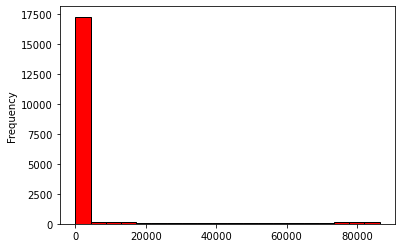

In [97]:
# Mostrem la frequencia de valors faltants segons els valors de la diferència en segons.
my_hist = diff_icu_outtime["difference"].dt.seconds.plot(kind='hist', color='red', edgecolor='black', bins=20)